In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


# Supervised Learning
* a series of inputs and corresponding outputs are given to the system
* the system produces a function that provides that situation with techniques such as regression.

# EXPLORATORY DATA ANALYSIS (EDA)
* It is a method for analyzing data sets to summarize its basic features, usually by visual methods.


I explained the Supervised Learning and EDA in a easy words. Now it's time to code.

* Firstly we need to import libraries which are exactly necessary for us.
* These are matplotlib.pylot and seaborn libraries.
* matplotlib.pyplot for graphic drawings.
* seaborn for visualization.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

* Let's read our data and look into it with data.head() function.
* data.head() function allows us to see the first 5 lines.


In [11]:
data = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* Is there any NaN value and length of this data? So lets look at info.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


As you can see:

    * length:303(range index)
    * 14 columns have values. As you can see they are non-null.
    * 13 columns have values which are integer.
    * 1 column has value which is float.

 * The "describe()" function allows us to see the statistical summary of the columns.So let's look it.

In [13]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


* Now we will do correlation of columns.
* Then we will explain:"What is Correlation?".**

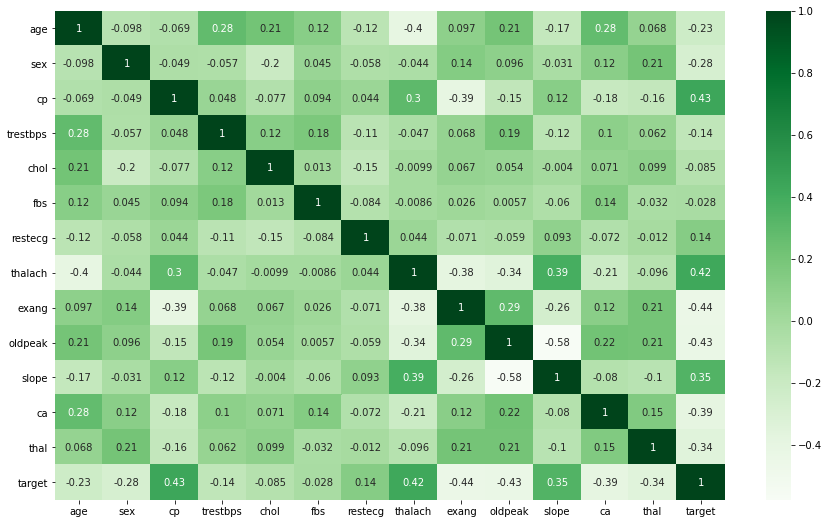

In [14]:
plt.subplots(figsize =(15,9))
sns.heatmap(data.corr(),cmap="Greens",annot = True)
plt.show()

Now it's time to explain somethings:
    
    * Dark tones represent positive correlation.
    * Light tones represent negative correlation.
    
    
    * So let's compare somethings:
        * Slope has positive correlation with thalach.
        * Slope has negative correlation with oldpeak.
 


1    165
0    138
Name: target, dtype: int64

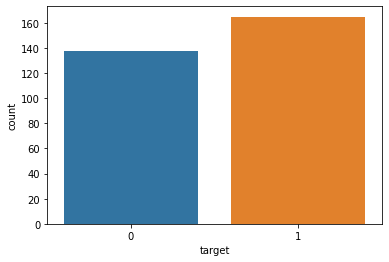

In [15]:
sns.countplot(x = "target", data = data)
data.loc[:,"target"].value_counts()

* We can learn how many men and how many women.

#   K-NEAREST NEIGHBORS (KNN)
    * KNN: Look at the K closest labeled data points.
    * Classification method.
    * First we need to train our data. Train = fit
    * fit(): fits the data, train the data.
    * Let's show it.


In [17]:
##### from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
x_data,y = data.loc[:,data.columns != 'target'], data.loc[:,'target']
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.3, random_state =42)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

print(" Accuracy result for K = 3: ",knn.score(x_test,y_test))


 Accuracy result for K = 3:  0.6263736263736264


* We found accuracy result for K value.
* Well,how can we find the best K value? The answer is in model complexity.

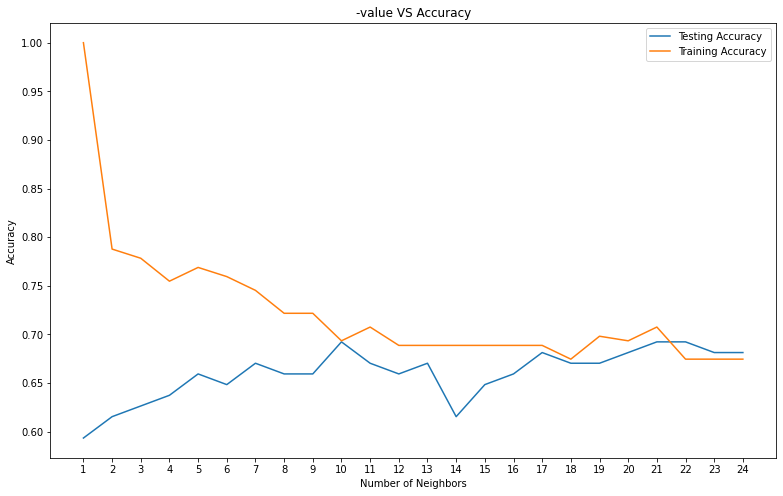

Best accuracy is 0.6923076923076923 with K = 10


In [18]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of K
for i, K in enumerate(neig):
    # K from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors = K)
    # Fit with KNN
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize = [13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

* According to result, the best K value is 10.
* Now let's find other accuracy results with another classification methods.

# Logistic Regression
  * Logistic Regression is a regression method for classifying operations. It is used for classification of categorical or numerical data. It works only if the dependent variable, that is, the result can only take 2 different values.

In [19]:
from sklearn.linear_model import LogisticRegression

# normalization
x = (x_data - np.min(x_data)/(np.max(x_data) - np.min(x_data)))
# train test split
from sklearn.model_selection import train_test_split
x_data,y = data.loc[:,data.columns != 'target'], data.loc[:,'target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

lr = LogisticRegression(random_state = 42)
lr.fit(x_train,y_train)

print("Accuracy result of Logistic Regression is {} ".format(lr.score(x_test,y_test)))

Accuracy result of Logistic Regression is 0.8131868131868132 


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Support Vector Machine (SVM)
* It is named as the right decision line that divides the data set into two. Although it is possible to draw infinite decision lines, the important thing is to determine the optimal, that is, the most appropriate decision line.

In [20]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)

svm.fit(x_train,y_train)

print("Accuracy result of SVM is : ",svm.score(x_test,y_test))

Accuracy result of SVM is :  0.7032967032967034


# Naive Bayes Classification
* The way the algorithm works calculates the probability of each state for an element and classifies it based on the highest probability value.

In [21]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

print("Accuracy result of Naive Bayes is ",nb.score(x_test,y_test))

Accuracy result of Naive Bayes is  0.8351648351648352


# Decision Tree Classification
* Working logic creates more than one decision tree. When it will produce a result, the average value in these decision trees is taken and the result is produced.
* Also I'll use Confusion Matrix. What is Confusion Matrix?
    * Where the output is two or more, machine learning classification problems exist to measure performance. It is a table with 4 different combinations with predicted and real values.

Accuracy result of Decision Tree Classifier is  0.7362637362637363


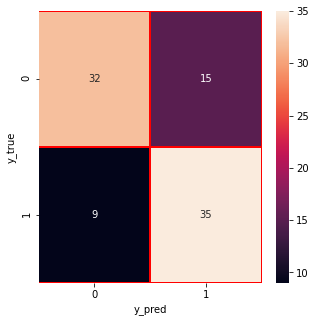

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Accuracy result of Decision Tree Classifier is ",dt.score(x_test,y_test))

y_pred = dt.predict(x_test)
y_true = y_test

# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_true)

# we can visualization
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Random Forest Classification
* Random Forest is one of the popular machine learning models because it gives good results even without hyper parameter estimation and is applicable to both regression and classification problems.


Accuracy result of Random Forest Classification is  0.8131868131868132


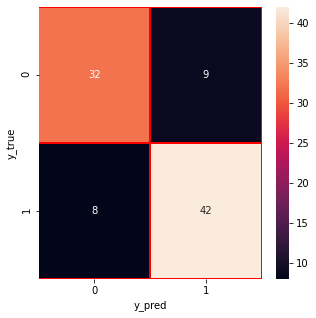

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)

print("Accuracy result of Random Forest Classification is ",rf.score(x_test,y_test))

y_pred = rf.predict(x_test)
y_true = y_test

# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

# %% cm visualization
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True,linewidths = 0.5,linecolor = "red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

  **Comparison of Classification models**

* KNN Model: 0.6923
* Logistic Regression Model: 0.8131
* Supporting Vector Machine (SVM) Model: 0.7032
* Naive Bayes Classification Model: 0.8351
* Decision Tree Classification Model: 0.7472
* Random Forest Classification Model: 0.8131

        * As you can see the most suitable model for our dataset is Naive Bayes Classification Model.
        * I look forward to your appreciation and criticism.
        * I apologize for any misspellings, if any.
        
